# Lesson 7 Practice: Matplotlib

Use this notebook to follow along with the lesson in the corresponding lesson notebook: [L07-Matplotlib-Lesson.ipynb](./L07-Matplotlib-Lesson.ipynb).  


## Instructions
Follow along with the teaching material in the lesson. Throughout the tutorial sections labeled as "Tasks" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png). You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. For each task, use the cell below it to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup

Import the following packages:
+ `pandas` as `pd`
+ `numpy` as `np`
+ `matplotlib.pyplot` as `plt`

Activate the `%matplotlib inline` magic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1b: Load Data

Load the Iris data (same as in the Pandas tasks).


In [4]:
iris_df = pd.read_csv('./data/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 2a: Create a figure

Create the a scatter plot using the iris data, but compare `petal_width` to `petal_length`.  Be sure to add labels to the axes.

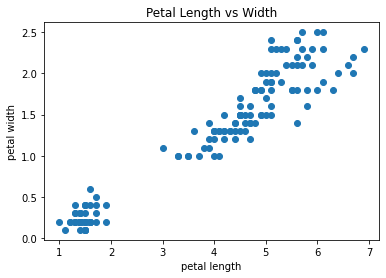

In [11]:
# creating figure and axes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(iris_df['petal_length'],iris_df['petal_width'])

# adding axis labels
ax.axes.set_xlabel('petal length')
ax.axes.set_ylabel('petal width')

# adding Plot Title
ax.set_title("Petal Length vs Width")

plt.show()


## Task 3a: Figure Style

Create a scatter plots using the iris data frame. Do not convert the data frame columns to numpy arrays. Rather use the dataframe as is. Be sure to:
- plot `petal_length` vs `petal_width`.
- Use column names to specify the x and y coordinates (don't pass in Numpy arrays)
- Color each dot by the species (you'll need to be creative to do this).
  - Hint 1: use the [pd.Series.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) function to convert species names to colors). 
  - Hint 2: Use the color abbreviations we learned for the the plot function (e.g. 'r', 'b', 'g', etc.).
- Add axis labels

In [21]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
# adding a column to specify different color for each species

species_color = iris_df['species']
species_color = species_color.replace(['setosa','versicolor','virginica'],['r','g','b'])
iris_df['species_color'] = species_color
iris_df.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,species,species_color
86,6.7,3.1,4.7,1.5,versicolor,g
62,6.0,2.2,4.0,1.0,versicolor,g
5,5.4,3.9,1.7,0.4,setosa,r
118,7.7,2.6,6.9,2.3,virginica,b
53,5.5,2.3,4.0,1.3,versicolor,g


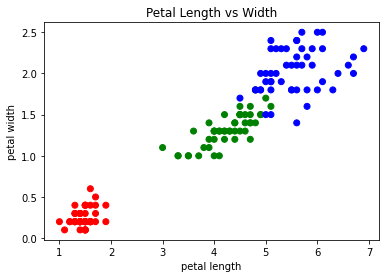

In [31]:
# creating figure and axes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#ax.scatter(iris_df['petal_length'],iris_df['petal_width'],c= iris_df['species_color'])
ax.scatter('petal_length','petal_width', c = 'species_color',data = iris_df)


# adding axis labels
ax.axes.set_xlabel('petal length')
ax.axes.set_ylabel('petal width')

# adding Plot Title
ax.set_title("Petal Length vs Width")


plt.show()

## Task 4a: Categorical plots

Create a bar graph that indicates the mean `sepal_length` of each subspecies.

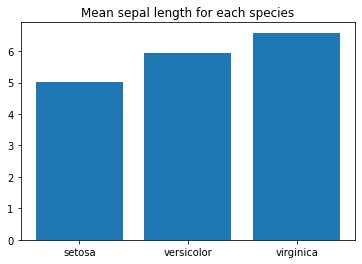

In [58]:
# creating figure and axes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sepal_length_mean = iris_df.groupby(by='species')['sepal_length'].mean()

ax.bar(sepal_length_mean.index,sepal_length_mean.values)
ax.set_title("Mean sepal length for each species")

plt.show()

## Task 6a:  Multiple Plots

Create 4 scatterplots for the iris data all in one figure. The figure should include scatterplots of these comparisions:
- `sepal_length` x `petal_length`
- `sepal_length` x `petal_width`
- `sepal_width` x `petal_length`
- `sepal_width` x `petal_width`

Be sure that:
- the points for the species 
- the axes for each plot are labeled
- the figure has a label.

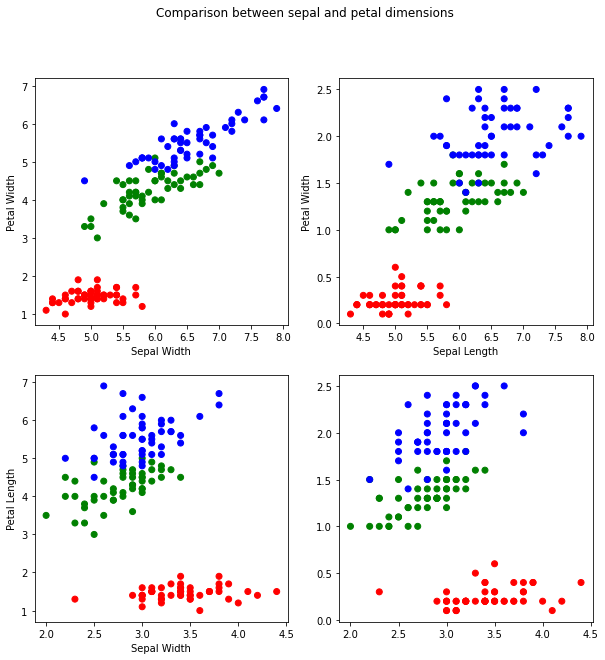

In [69]:
fig,axes = plt.subplots(2,2 ,figsize=(10,10))
axes[0,0].scatter('sepal_length','petal_length',c='species_color',data=iris_df)
axes[0,0].set_xlabel('Sepal Length')
axes[0,0].set_ylabel('Petal Length')

axes[0,1].scatter('sepal_length','petal_width',c='species_color',data=iris_df)
axes[0,1].set_xlabel('Sepal Length')
axes[0,1].set_ylabel('Petal Width')
                     
axes[1,0].scatter('sepal_width','petal_length',c='species_color',data=iris_df)
axes[1,0].set_xlabel('Sepal Width')
axes[1,0].set_ylabel('Petal Length')

axes[1,1].scatter('sepal_width','petal_width',c='species_color',data=iris_df)
axes[0,0].set_xlabel('Sepal Width')
axes[0,0].set_ylabel('Petal Width')

fig.suptitle("Comparison between sepal and petal dimensions")

plt.show()